### Load data

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [247]:
dataset = '../data/Medicaldataset.csv'
df = pd.read_csv(dataset, header=0)

In [248]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [249]:
df.shape

(1319, 9)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


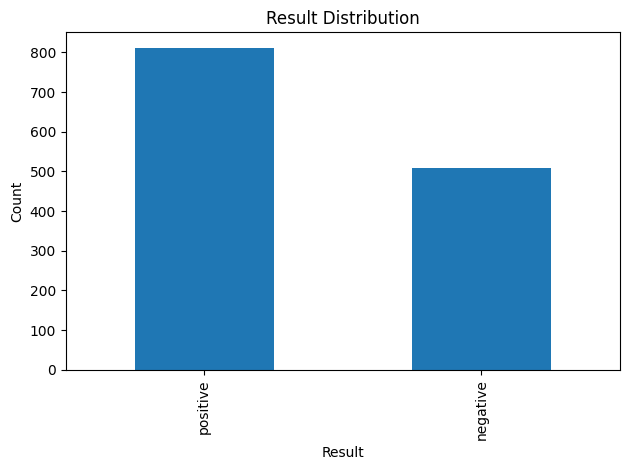

In [251]:
# Loop through non-numeric columns
for column in df.select_dtypes(include='object').columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

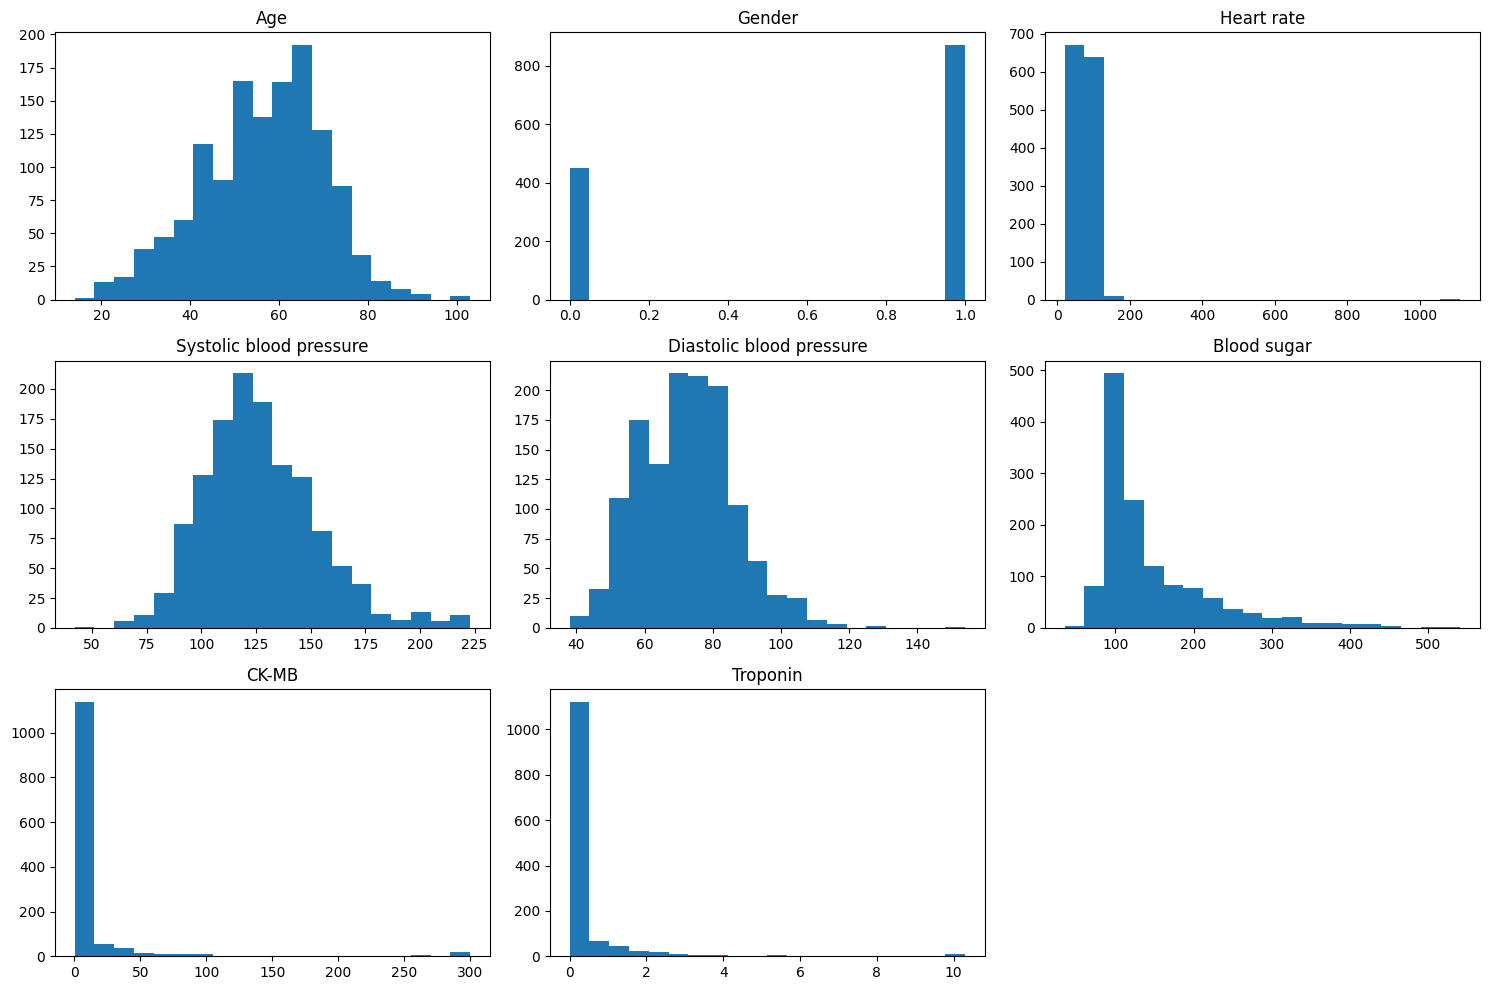

In [252]:
df.hist(bins=20, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

### Missing values

In [253]:
df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

### Outliers

<Axes: >

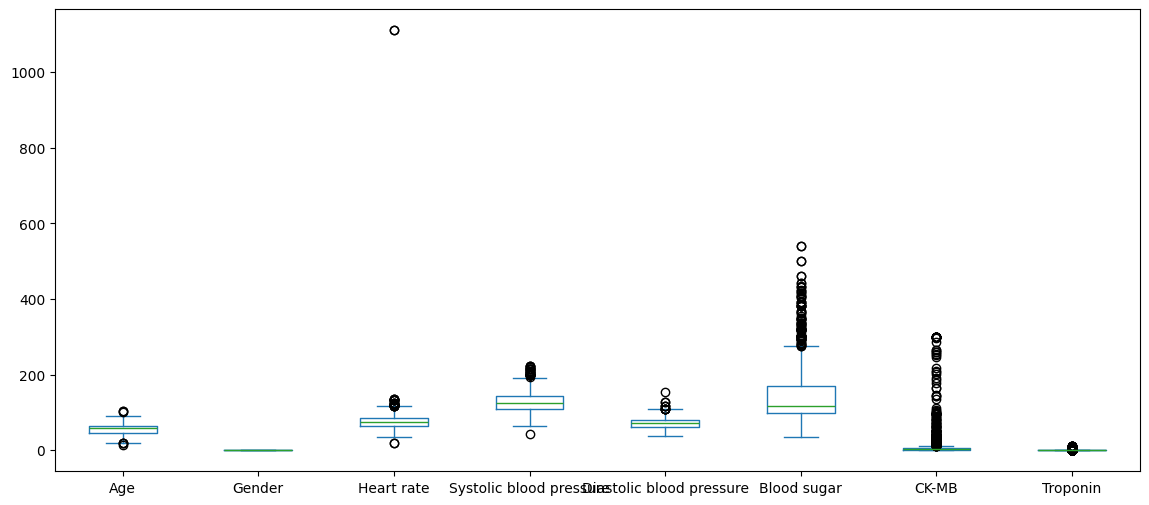

In [254]:
df.plot(kind='box', figsize=(14,6))

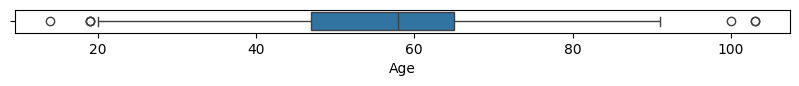

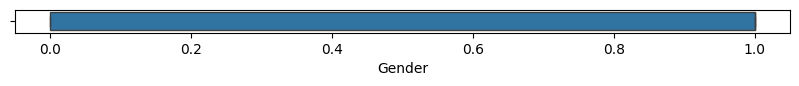

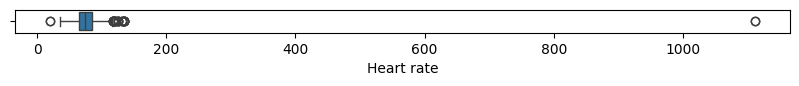

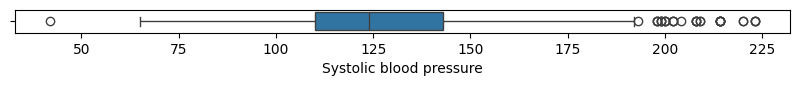

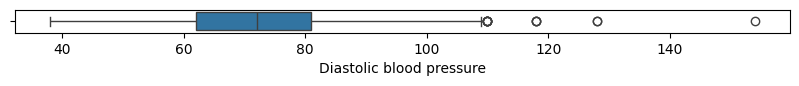

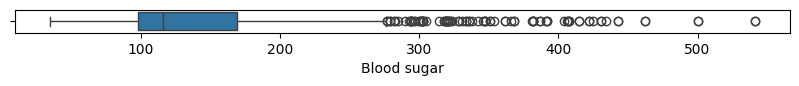

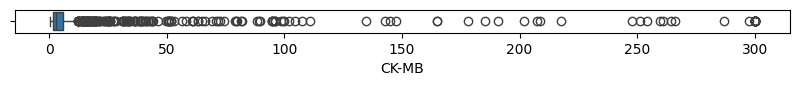

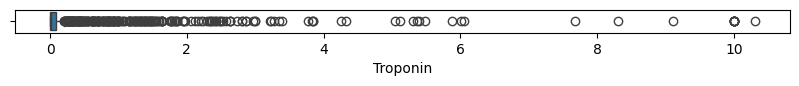

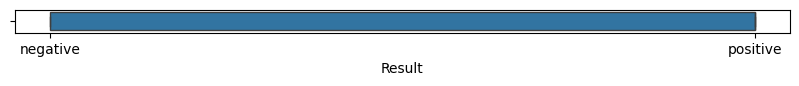

In [255]:
for column in df:
    plt.figure(figsize=(10,0.3))
    sns.boxplot(df[column], orient='h')

In [256]:
print('Upper and Lower Fence (IQR method):')

for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    print(f"{column}: Lower Fence = {lower_fence}, Upper Fence = {upper_fence}")


Upper and Lower Fence (IQR method):
Age: Lower Fence = 20.0, Upper Fence = 92.0
Gender: Lower Fence = -1.5, Upper Fence = 2.5
Heart rate: Lower Fence = 32.5, Upper Fence = 116.5
Systolic blood pressure: Lower Fence = 60.5, Upper Fence = 192.5
Diastolic blood pressure: Lower Fence = 33.5, Upper Fence = 109.5
Blood sugar: Lower Fence = -9.25, Upper Fence = 276.75
CK-MB: Lower Fence = -4.57, Upper Fence = 12.030000000000001
Troponin: Lower Fence = -0.11324999999999998, Upper Fence = 0.20475


In [257]:
print('Outliers (IQR method on numerical columns):')

# Loop through only numerical columns
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_fence) | (df[column] > upper_fence)]
    print(f"{column}: {len(outliers)} outliers")


Outliers (IQR method on numerical columns):
Age: 7 outliers
Gender: 0 outliers
Heart rate: 29 outliers
Systolic blood pressure: 32 outliers
Diastolic blood pressure: 12 outliers
Blood sugar: 92 outliers
CK-MB: 205 outliers
Troponin: 257 outliers


In [258]:
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)  # Calculating quantiles for IQR
    Q3 = df[column].quantile(0.75)  # Calculating quantiles for IQR
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    df = df[~((df [column] < Lower_Fence) |(df[column] > Upper_Fence))]

df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
2,55,1,64,160,77,270.0,1.99,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
8,44,0,60,154,81,135.0,2.35,0.004,negative
...,...,...,...,...,...,...,...,...,...
1311,85,1,112,115,69,114.0,2.19,0.062,positive
1312,48,1,84,118,68,96.0,5.33,0.006,negative
1313,86,0,40,179,68,147.0,5.22,0.011,negative
1314,44,1,94,122,67,204.0,1.63,0.006,negative


### Encoding Categorical Nonnumerical Variables with LabelEncoding and OneHotEncoder

In [259]:
data_column_category =df.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['Result'], dtype='object')

In [260]:
df[data_column_category].head()

,Result
0,negative
2,negative
5,negative
6,negative
8,negative


In [261]:
# Initialiser encoder
# onehot_encoder = OneHotEncoder(sparse_output=False)  # Brug sparse=False hvis du bruger ældre scikit-learn

# Fit og transformér de kategoriske kolonner
# onehot_encoded = onehot_encoder.fit_transform(df[data_column_category])

# Lav en DataFrame med kolonnenavne
# onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(data_column_category))


In [262]:
# Behold numeriske kolonner
# data_column_numeric = df.select_dtypes(include=[np.number]).reset_index(drop=True)

# Kombinér
# df = pd.concat([onehot_encoded_df, data_column_numeric], axis=1)


In [263]:
# print("One-hot encodet DataFrame:")
# df.head()


In [264]:
# df.columns

In [265]:
# Option 1: Save as CSV (most common)
df.to_csv("../data/cleaned_Medicaldataset.csv.csv", index=False)